# Comparison of the performances for the different models

Trained models: random forest, perceptron (with and without elasticnet regularization), SVM

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

## Loading results

In [19]:
methods = ["RF", "RRandomForest", "Perceptron", "Perceptron", "SVC", "SVC",
           "RSVM", "RSVM", "DNN_patient","DNN_patient", "GNN_patient","GNN_patient", 
           "GNN_HPRD_PPI", "GNN_HPRD_PPI", "GNN_HPRD_ct", "GNN_HPRD_ct", 
           "GNN_HPRD_random", "GNN_HPRD_random", "GNN_HPRD_complete", "GNN_HPRD_complete",
           "glmgraphHPRD_PPI", "glmgraphHPRD_PPI", "glmgraphHPRD_ct", "glmgraphHPRD_ct", "glmgraphHPRD_random", 
           "glmgraphHPRD_random", "glmgraphHPRD_complete"]
prep = ["", "", "", "_scaled", "", "_scaled", "", "_scaled", "", "_scaled", "", "_scaled", 
        "", "_scaled", "", "_scaled", "", "_scaled", "","_scaled", 
        "", "_scaled", "", "_scaled", "", "_scaled", 
        "_scaled"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/BreastCancer/" + methods[ind] + "Scores" + prep[ind] + "_2023-11-09.obj"
    file = open(file, "rb")
    desc_met = methods[ind] + prep[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)

## Computing means and standard deviations

### Means

In [3]:
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc", "train_accuracy","train_balanced_accuracy"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = all_scores[metnames[i]][scorelist[j]].mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)
# print dataframe.
all_means

fit_time  score_time  test_accuracy  \
RF                                5.328770    0.506582       0.762586   
RRandomForest                   433.745800    0.621400       0.753329   
Perceptron                       24.121482    0.022459       0.659375   
Perceptron_scaled                14.114690    0.118036       0.758484   
SVC                               4.225931    1.739905       0.729596   
SVC_scaled                        4.682415    2.036564       0.765722   
RSVM                             81.847900   13.171400       0.764691   
RSVM_scaled                      84.293200   13.712300       0.765722   
DNN_patient                       1.939750    0.329203       0.592365   
DNN_patient_scaled                3.108284    0.331497       0.712049   
GNN_patient                       1.789416    0.326977       0.632571   
GNN_patient_scaled                1.748102    0.329714       0.691345   
GNN_HPRD_PPI                     53.949199    0.050079       0.751256   
GNN_HPRD_PPI_scaled              55.071351    0.051564       0.763660   
GNN_HPRD_ct                     111.868442    0.081499       0.739916   
GNN_HPRD_ct_scaled              112.015067    0.082637       0.761576   
GNN_HPRD_random                  53.864182    0.050900       0.741967   
GNN_HPRD_random_scaled           53.516666    0.049731       0.764723   
GNN_HPRD_complete                54.754742    0.053757       0.749248   
GNN_HPRD_complete_scaled         55.000554    0.054492       0.728555   
glmgraphHPRD_PPI              34928.589100    0.078500       0.699624   
glmgraphHPRD_PPI_scaled       26707.680700    0.080800       0.738864   
glmgraphHPRD_ct               35527.208500    0.076800       0.692504   
glmgraphHPRD_ct_scaled        26772.157200    0.091000       0.746080   
glmgraphHPRD_random           33347.751000    0.072000       0.672799   
glmgraphHPRD_random_scaled    26618.783600    0.085400       0.734751   
glmgraphHPRD_complete_scaled   8505.342300    0.087400       0.726514   

                              test_balanced_accuracy  test_roc_auc  \
RF                                          0.738211      0.826350   
RRandomForest                               0.729631      0.824700   
Perceptron                                  0.597796      0.659365   
Perceptron_scaled                           0.748167      0.827032   
SVC                                         0.699122      0.804363   
SVC_scaled                                  0.746893      0.831462   
RSVM                                        0.745564      0.829648   
RSVM_scaled                                 0.747313      0.831905   
DNN_patient                                 0.512975      0.665999   
DNN_patient_scaled                          0.707126      0.759871   
GNN_patient                                 0.630262      0.704639   
GNN_patient_scaled                          0.681444      0.750317   
GNN_HPRD_PPI                                0.733036      0.818869   
GNN_HPRD_PPI_scaled                         0.746304      0.820744   
GNN_HPRD_ct                                 0.718008      0.818338   
GNN_HPRD_ct_scaled                          0.749834      0.819339   
GNN_HPRD_random                             0.724440      0.822033   
GNN_HPRD_random_scaled                      0.749296      0.820443   
GNN_HPRD_complete                           0.736478      0.820172   
GNN_HPRD_complete_scaled                    0.709504      0.804873   
glmgraphHPRD_PPI                            0.665604      0.665604   
glmgraphHPRD_PPI_scaled                     0.718198      0.718198   
glmgraphHPRD_ct                             0.652827      0.652827   
glmgraphHPRD_ct_scaled                      0.724730      0.724730   
glmgraphHPRD_random                         0.623864      0.623864   
glmgraphHPRD_random_scaled                  0.711253      0.711253   
glmgraphHPRD_complete_scaled                0.709736      0.709736   

                            

### Standard deviations

In [4]:
all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = all_scores[metnames[i]][scorelist[j]].std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)
# print dataframe.
all_std

fit_time  score_time  test_accuracy  \
RF                               0.281422    0.010103       0.038157   
RRandomForest                   22.713778    0.082229       0.037185   
Perceptron                      13.724765    0.005986       0.074128   
Perceptron_scaled                1.036167    0.006028       0.041733   
SVC                              0.031650    0.055248       0.024117   
SVC_scaled                       0.040885    0.020855       0.033375   
RSVM                             0.823904    0.109876       0.031313   
RSVM_scaled                      0.462978    0.097413       0.031406   
DNN_patient                      0.986457    0.031826       0.006715   
DNN_patient_scaled               0.951620    0.026441       0.028101   
GNN_patient                      0.651402    0.035254       0.043165   
GNN_patient_scaled               0.583760    0.037771       0.042936   
GNN_HPRD_PPI                     0.736050    0.002245       0.031709   
GNN_HPRD_PPI_scaled              1.237215    0.000480       0.035037   
GNN_HPRD_ct                      0.231606    0.001622       0.033356   
GNN_HPRD_ct_scaled               0.227382    0.001645       0.028891   
GNN_HPRD_random                  2.136822    0.002190       0.022069   
GNN_HPRD_random_scaled           2.318950    0.002421       0.036428   
GNN_HPRD_complete                0.566991    0.001520       0.023755   
GNN_HPRD_complete_scaled         0.475243    0.002602       0.026043   
glmgraphHPRD_PPI              1491.664555    0.049468       0.053501   
glmgraphHPRD_PPI_scaled        621.587671    0.044652       0.028869   
glmgraphHPRD_ct               2211.521476    0.065089       0.044415   
glmgraphHPRD_ct_scaled         563.662760    0.052019       0.031463   
glmgraphHPRD_random           1342.690391    0.058286       0.045678   
glmgraphHPRD_random_scaled     640.461970    0.044652       0.023849   
glmgraphHPRD_complete_scaled   829.790606    0.078531       0.021833   

                              test_balanced_accuracy  test_roc_auc  \
RF                                          0.039070      0.033550   
RRandomForest                               0.037569      0.038116   
Perceptron                                  0.108640      0.161926   
Perceptron_scaled                           0.036771      0.031853   
SVC                                         0.026447      0.033669   
SVC_scaled                                  0.028965      0.036761   
RSVM                                        0.027215      0.036945   
RSVM_scaled                                 0.027085      0.036906   
DNN_patient                                 0.038926      0.103322   
DNN_patient_scaled                          0.027924      0.045187   
GNN_patient                                 0.047374      0.066882   
GNN_patient_scaled                          0.044975      0.037393   
GNN_HPRD_PPI                                0.033328      0.033112   
GNN_HPRD_PPI_scaled                         0.034217      0.033777   
GNN_HPRD_ct                                 0.034115      0.034892   
GNN_HPRD_ct_scaled                          0.028816      0.034583   
GNN_HPRD_random                             0.022675      0.025154   
GNN_HPRD_random_scaled                      0.034856      0.032292   
GNN_HPRD_complete                           0.023772      0.030591   
GNN_HPRD_complete_scaled                    0.028149      0.038158   
glmgraphHPRD_PPI                            0.070300      0.070300   
glmgraphHPRD_PPI_scaled                     0.028763      0.028763   
glmgraphHPRD_ct                             0.052421      0.052421   
glmgraphHPRD_ct_scaled                      0.034590      0.034590   
glmgraphHPRD_random                         0.064126      0.064126   
glmgraphHPRD_random_scaled                  0.021843      0.021843   
glmgraphHPRD_complete_scaled                0.024189      0.024189   

                              train_accuracy  train_bal

## Plotting results

### Averaged results

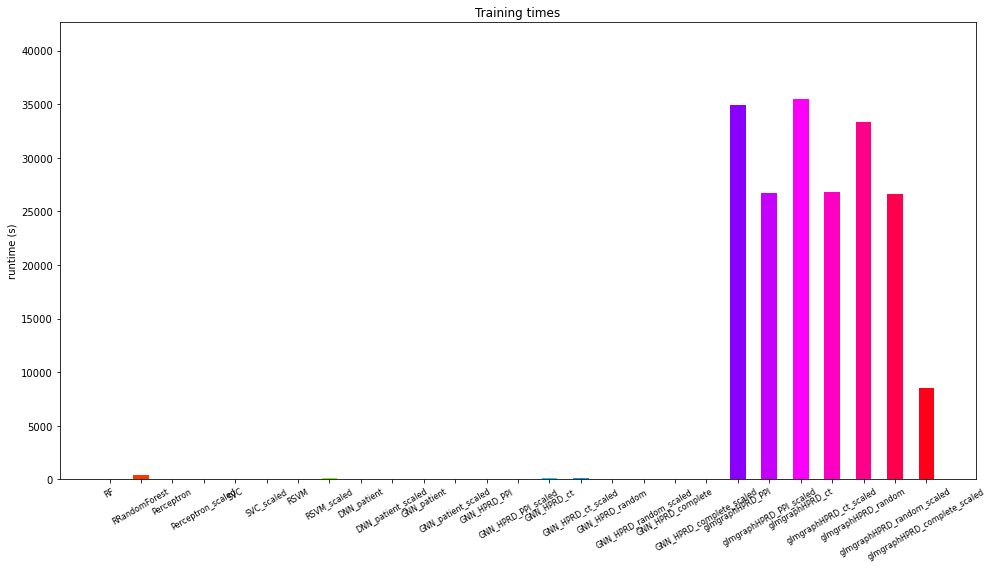

In [5]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

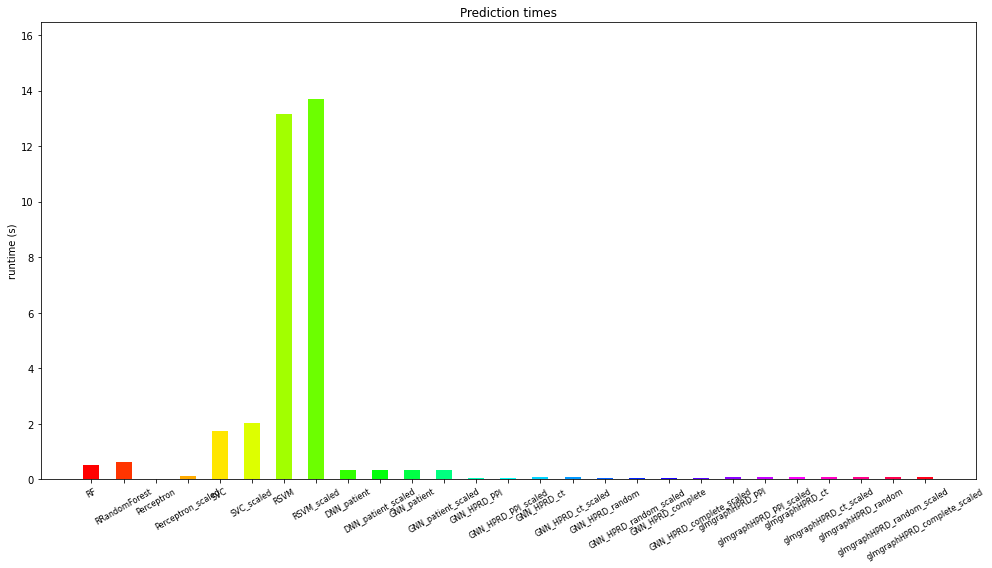

In [6]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

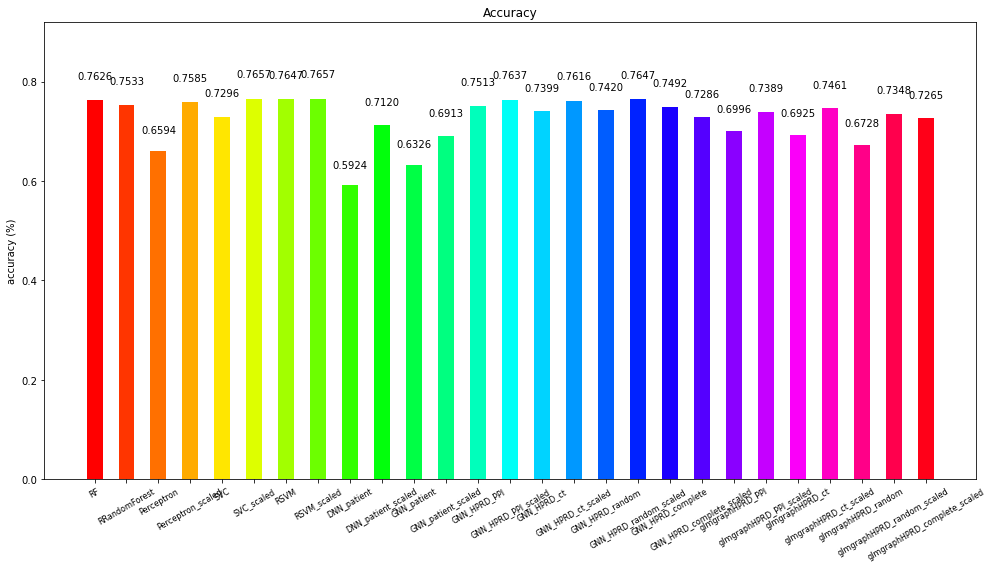

In [7]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

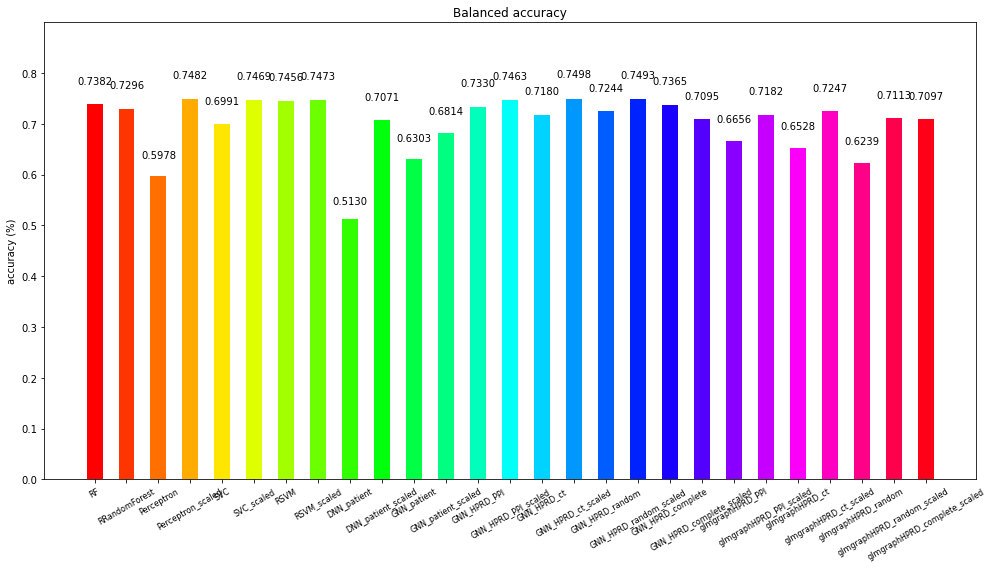

In [8]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

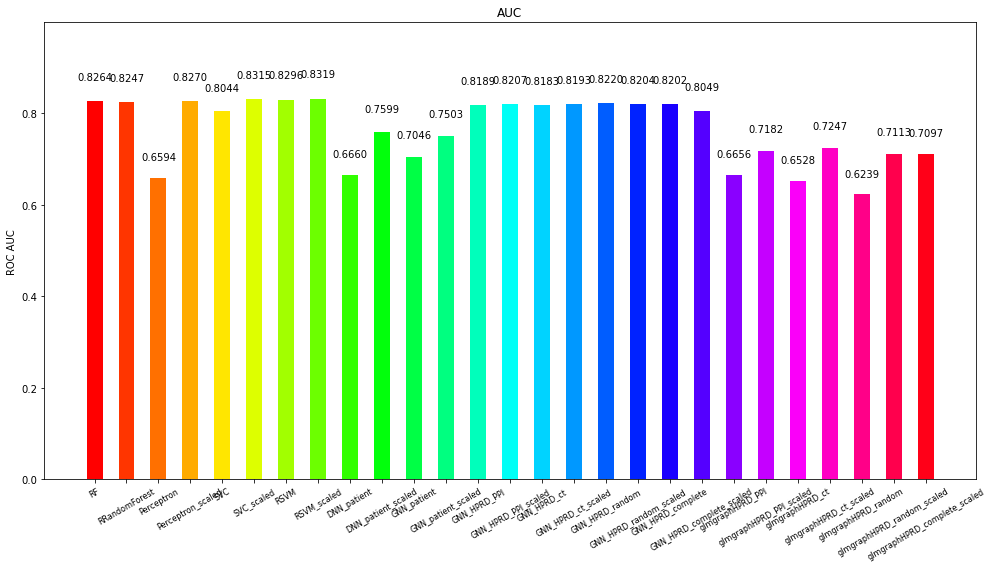

In [9]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()

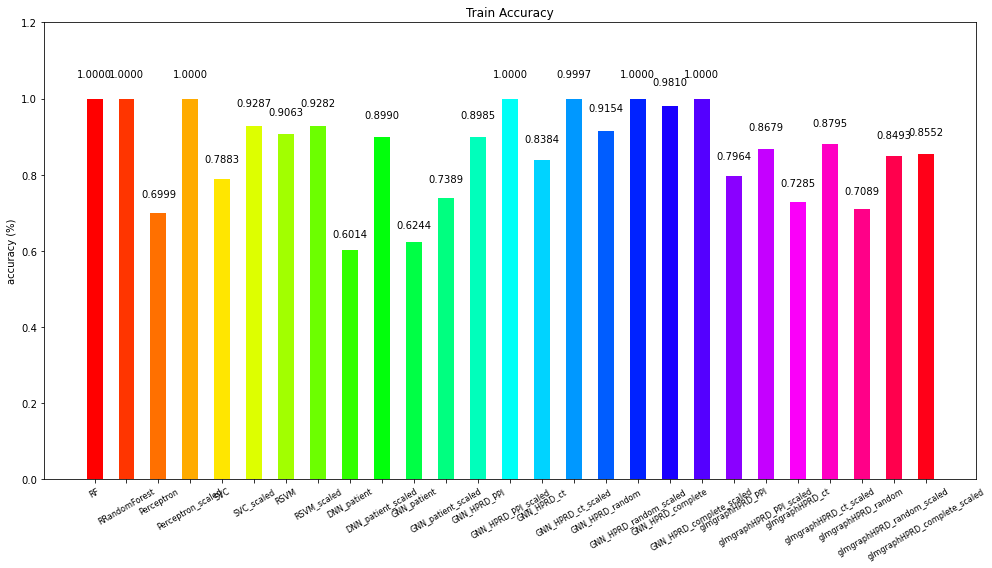

In [10]:
accuracy = all_means["train_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Train Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

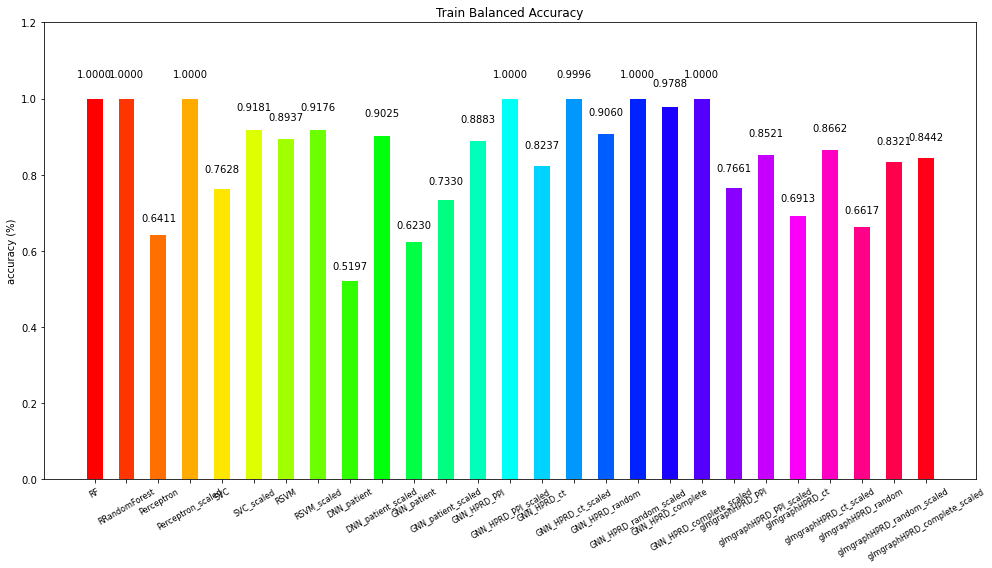

In [11]:
accuracy = all_means["train_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Train Balanced Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

### Full distribution

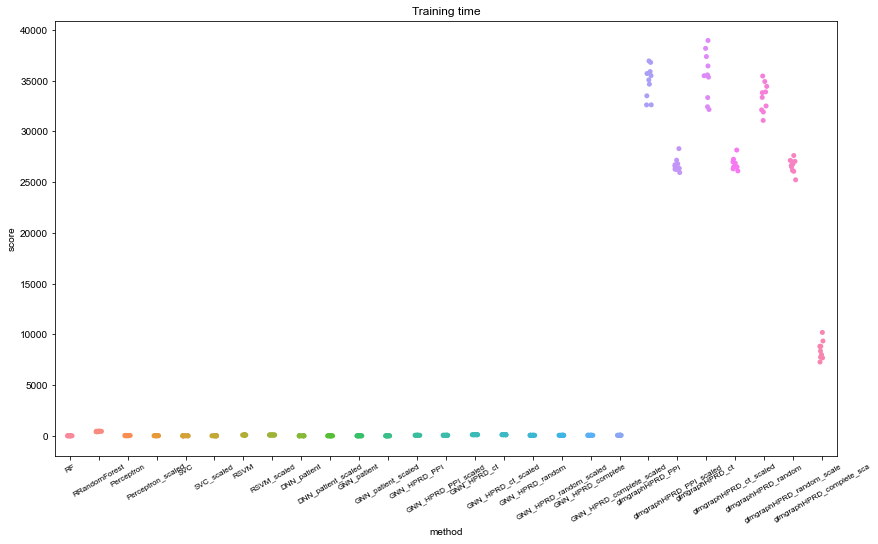

In [12]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["fit_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Training time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

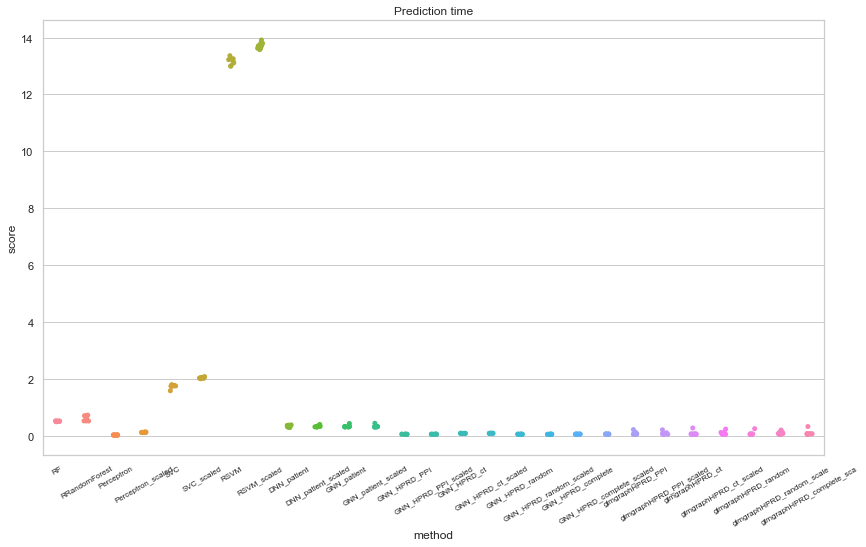

In [13]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["score_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Prediction time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

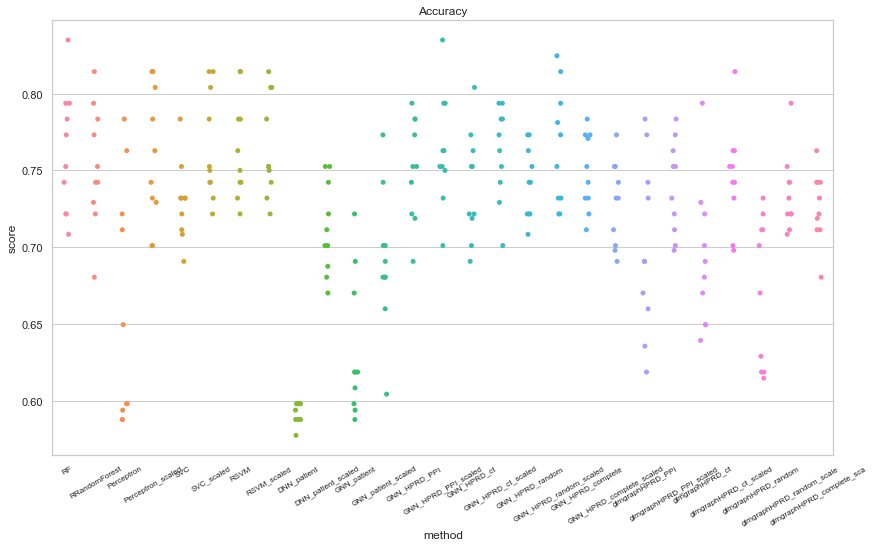

In [14]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

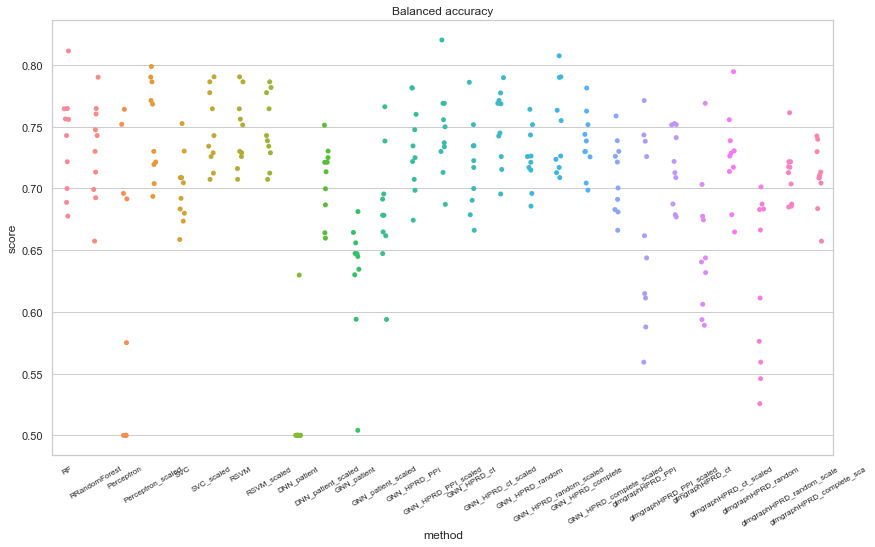

In [15]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_balanced_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Balanced accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

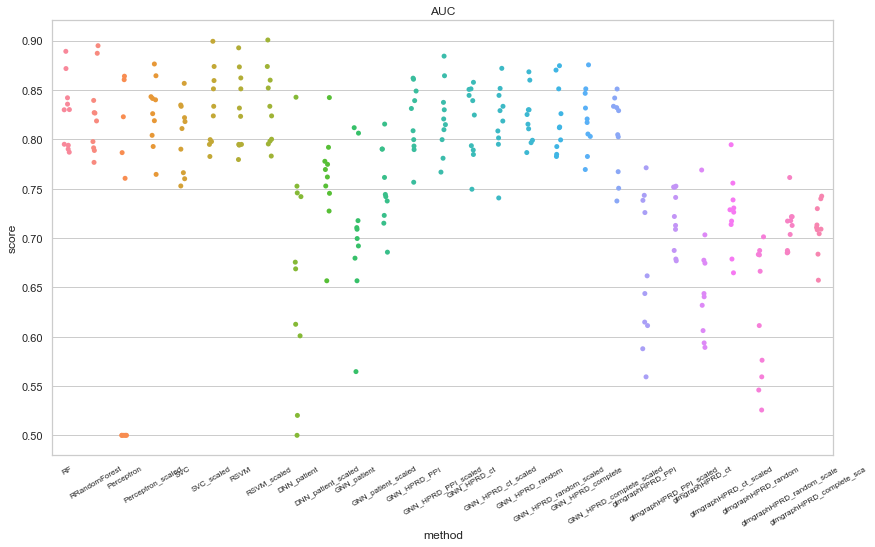

In [16]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_roc_auc"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("AUC")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

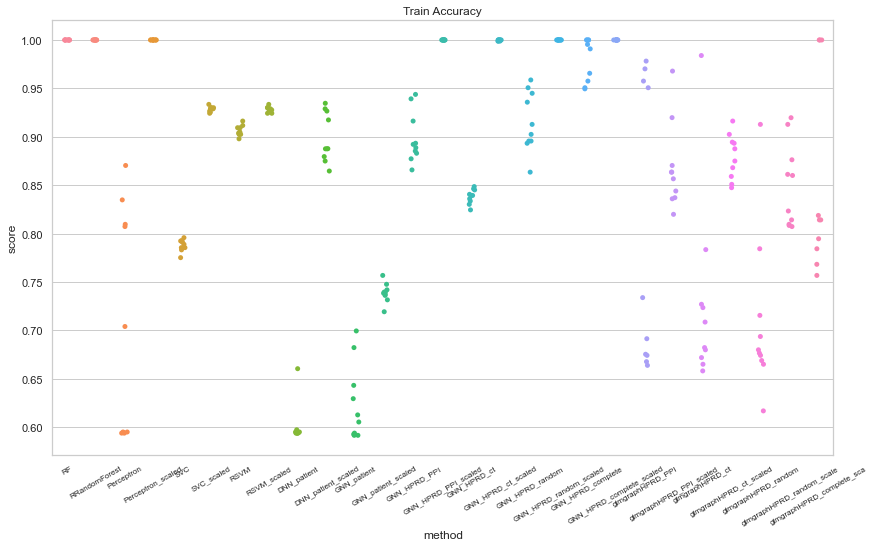

In [17]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train Accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

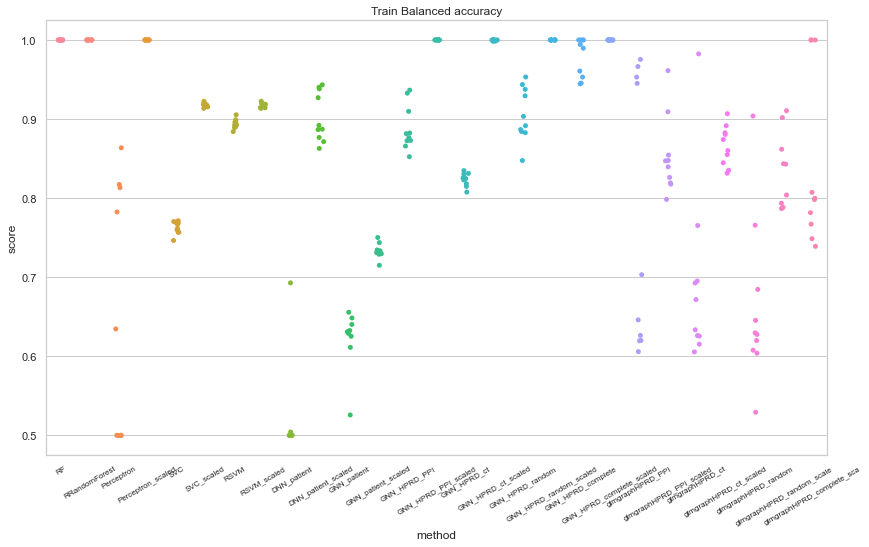

In [18]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_balanced_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train Balanced accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()